# Prediction using Supervised ML (Task 1)


### Seunghyun Nam


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load data
data = pd.read_csv("http://bit.ly/w-data")

print(f"First few rows of the dataset: \n{data.head()}")
print(f"\n\nSummary Statistics of the dataset: \n{data.describe()}")

First few rows of the dataset: 
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Summary Statistics of the dataset: 
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [ ]:
# Check missing values
print(f"\n Missing values: \n{data.isnull().sum()}")


 Missing values: 
Hours     0
Scores    0
dtype: int64


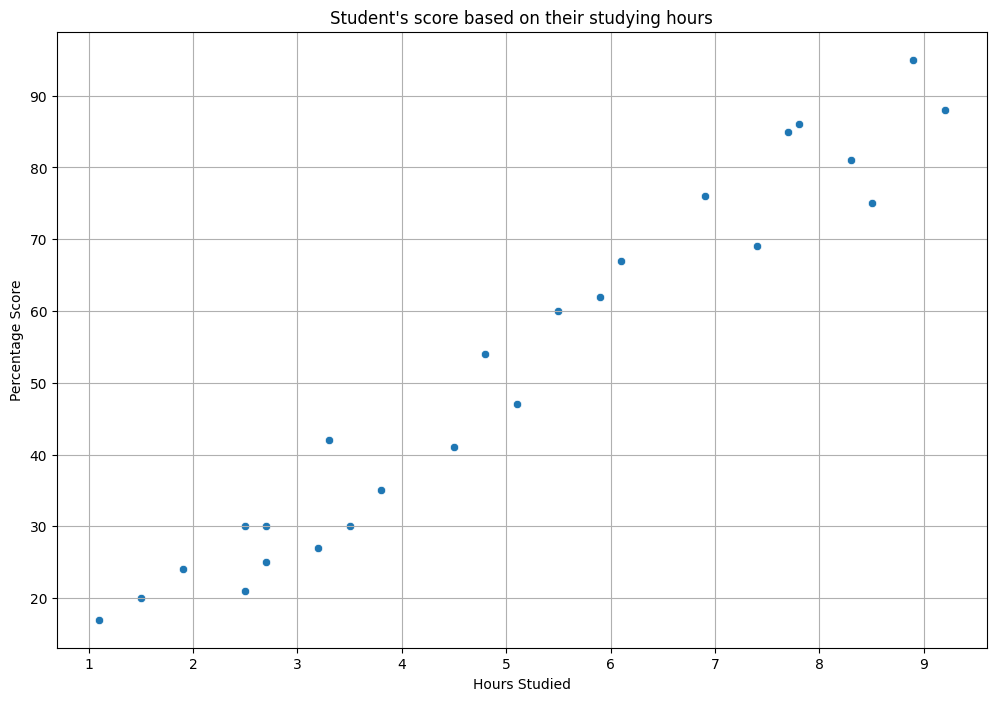

In [ ]:
# Visualize the data (Scatter Plot)
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Hours', y = 'Scores', data=data)
plt.title("Student's score based on their studying hours")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid(True)
plt.show()

In [ ]:
# Prepare the data
X = data[['Hours']]
y = data[['Scores']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Prediction
y_pred = model.predict(X_test)


In [ ]:
display(y_pred)

# Compare actual and predicted values
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print("\n\n Actual vs Predicted scores:")
print(df)

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])



 Actual vs Predicted scores:
   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error {rmse}")



Mean Absolute Error: 3.9207511902099244 
Mean Squared Error: 18.943211722315272 
Root Mean Squared Error 4.352380006653288


- The evaluation metrics indicate that the model has a reasonable prediction error, with the average prediction error being about 3.92 percentage point, and the standard deviation of the errors being about 4.35 percentage point.

In [ ]:
# Predict the score
hours = pd.DataFrame({'Hours': [9.25]})
predicted_score = model.predict(hours)
print(f"Predicted score (9.25 hours/day): {predicted_score[0][0]:.2f}")

Predicted score (9.25 hours/day): 92.39


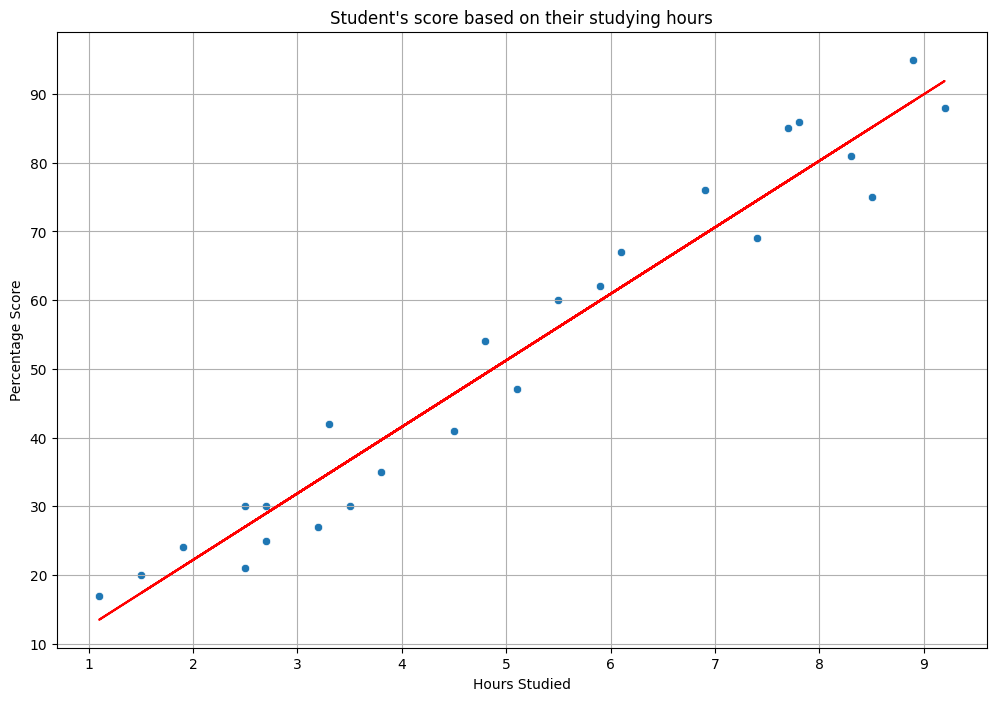

In [ ]:
# Visulization with the regression line
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Hours', y = 'Scores', data=data)
plt.plot(X, model.predict(X), color='red')
plt.title("Student's score based on their studying hours")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid(True)
plt.show()